In [1]:
f = open('esse.txt', "r", encoding="utf-8")
text = f.read()

In [2]:
len(text)

8725

In [3]:
text = text.lower()

In [4]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [6]:
text = "".join([ch for ch in text if ch not in spec_chars])

In [7]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [8]:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [9]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vladislav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
len(text_tokens)

1212

In [11]:
text_tokens[:10]

['сартра',
 'мы',
 'знаем',
 'как',
 'гениального',
 'писателя',
 'лауреата',
 'нобелевской',
 'премии',
 'по']

In [12]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words('russian')
text_sw = [word for word in text_tokens if not word in russian_stopwords]

In [13]:
import nltk
text = nltk.Text(text_sw)

In [14]:
print(type(text))

<class 'nltk.text.Text'>


In [15]:
text[:10]

['сартра',
 'знаем',
 'гениального',
 'писателя',
 'лауреата',
 'нобелевской',
 'премии',
 'литературе',
 'философа',
 'считает']

In [16]:
from nltk.probability import FreqDist
fdist = FreqDist(text)

In [17]:
fdist.most_common(5)

[('человек', 12), ('человека', 10), ('жизни', 10), ('жизнь', 8), ('сартр', 7)]

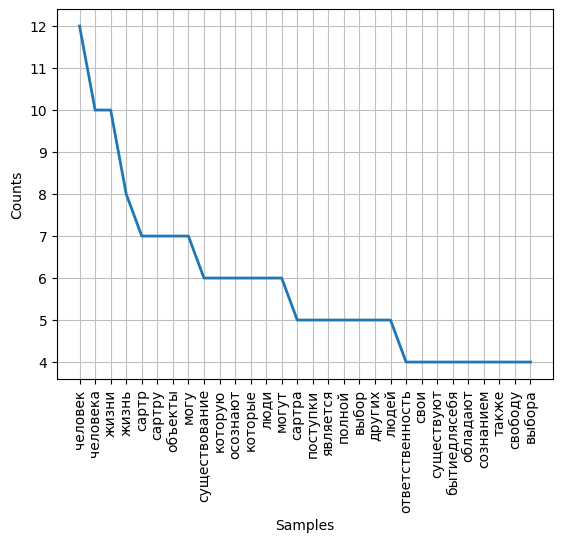

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [20]:
fdist.plot(30,cumulative=False)

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
text_raw = " ".join(text)

In [23]:
wordcloud = WordCloud().generate(text_raw)

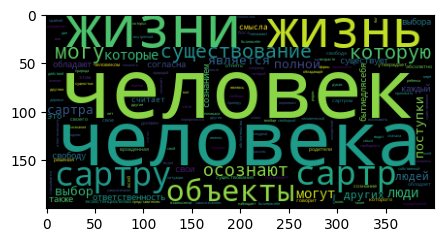

In [24]:
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)